In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import collections
import seaborn as sns

In [2]:
data_frame = pd.read_csv('/home/nascimento/Documents/ml2/who_suicide_statistics.csv')

data_frame.head(10)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
5,Albania,1985,female,75+ years,NaN,34200.0
6,Albania,1985,male,15-24 years,NaN,301400.0
7,Albania,1985,male,25-34 years,NaN,264200.0
8,Albania,1985,male,35-54 years,NaN,296700.0
9,Albania,1985,male,5-14 years,NaN,325800.0


In [3]:
data_frame.country.unique()

array(['Albania', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Cabo Verde', 'Canada', 'Cayman Islands', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Falkland Islands (Malvinas)', 'Fiji',
       'Finland', 'France', 'French Guiana', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong SAR', 'Hungary', 'Iceland',
       'Iran (Islamic Rep of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania

In [4]:
len(data_frame.country.unique())

141

In [5]:
'Linhas: {} | Colunas: {}'.format(data_frame.shape[0], data_frame.shape[1])

'Linhas: 43776 | Colunas: 6'

In [6]:
list(data_frame)

['country', 'year', 'sex', 'age', 'suicides_no', 'population']

In [7]:
var1 = data_frame.year.unique()
var1 = sorted(var1) 

print('Anos: ', end='')
for i in var1:
    print(i, end=' ')

var2 = data_frame.age.unique()

print('\n')
print('Faixa de idade: ', end='')
for i in var2:
    print(i, end=' | ')

Anos: 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 

Faixa de idade: 15-24 years | 25-34 years | 35-54 years | 5-14 years | 55-74 years | 75+ years | 

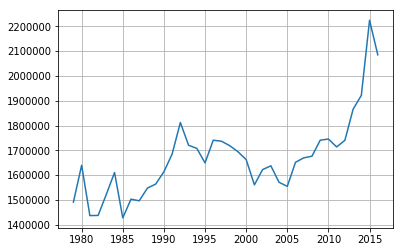

In [8]:
pais = data_frame.loc[data_frame['country'] == 'Brazil']
ano = data_frame.groupby(['year'])

x = list(map(int, ano['year'].unique()))
y = list(map(int, ano['population'].mean()))

plt.plot(x,y)
plt.grid(True)
plt.show()

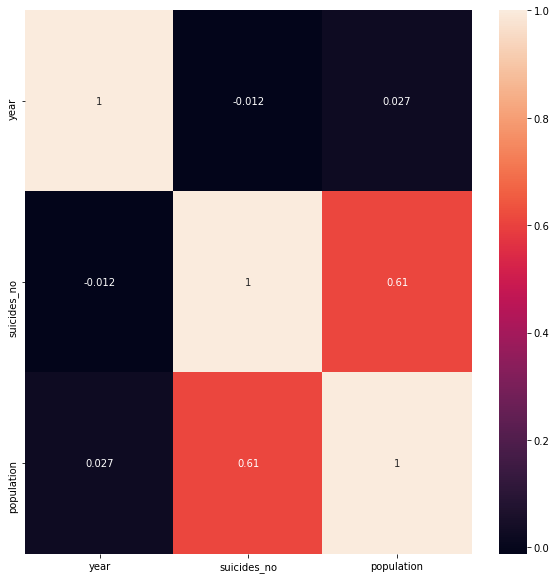

In [9]:
fig, tam = plt.subplots(figsize=(10,10))
c = data_frame.corr()
sns.heatmap(c, xticklabels=c.columns.values, yticklabels=c.columns.values, ax=tam, annot=True)


In [10]:
data_frame = data_frame.dropna()

data_frame.head(10)

,country,year,sex,age,suicides_no,population
24,Albania,1987,female,15-24 years,14.0,289700.0
25,Albania,1987,female,25-34 years,4.0,257200.0
26,Albania,1987,female,35-54 years,6.0,278800.0
27,Albania,1987,female,5-14 years,0.0,311000.0
28,Albania,1987,female,55-74 years,0.0,144600.0
29,Albania,1987,female,75+ years,1.0,35600.0
30,Albania,1987,male,15-24 years,21.0,312900.0
31,Albania,1987,male,25-34 years,9.0,274300.0
32,Albania,1987,male,35-54 years,16.0,308000.0
33,Albania,1987,male,5-14 years,0.0,338200.0


In [11]:
data_frame_before_normalization = data_frame.copy()
data_frame_before_normalization.head()

,country,year,sex,age,suicides_no,population
24,Albania,1987,female,15-24 years,14.0,289700.0
25,Albania,1987,female,25-34 years,4.0,257200.0
26,Albania,1987,female,35-54 years,6.0,278800.0
27,Albania,1987,female,5-14 years,0.0,311000.0
28,Albania,1987,female,55-74 years,0.0,144600.0


In [12]:
data_frame[['country', 'sex']] = data_frame[['country', 'sex']].astype('category')

data_frame['sex'] = data_frame['sex'].cat.codes
data_frame['country'] = data_frame['country'].cat.codes

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [13]:
data_frame.head()

,country,year,sex,age,suicides_no,population
24,0,1987,0,15-24 years,14.0,289700.0
25,0,1987,0,25-34 years,4.0,257200.0
26,0,1987,0,35-54 years,6.0,278800.0
27,0,1987,0,5-14 years,0.0,311000.0
28,0,1987,0,55-74 years,0.0,144600.0


In [14]:
data_frame.describe()

,country,year,sex,suicides_no,population
count,36060.000000,36060.000000,36060.000000,36060.000000,3.606000e+04
mean,57.739767,1998.935441,0.500000,221.809956,1.699996e+06
std,34.405399,10.163883,0.500007,855.449442,3.697811e+06
min,0.000000,1979.000000,0.000000,0.000000,2.590000e+02
25%,28.000000,1991.000000,0.000000,2.000000,8.056600e+04
50%,56.000000,2000.000000,0.500000,21.000000,3.757650e+05
75%,87.000000,2008.000000,1.000000,116.000000,1.344900e+06
max,117.000000,2016.000000,1.000000,22338.000000,4.380521e+07


In [15]:
data_frame['country'] = data_frame['country'] / data_frame['country'].max()
data_frame.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,country,year,sex,age,suicides_no,population
24,0.0,1987,0,15-24 years,14.0,289700.0
25,0.0,1987,0,25-34 years,4.0,257200.0
26,0.0,1987,0,35-54 years,6.0,278800.0
27,0.0,1987,0,5-14 years,0.0,311000.0
28,0.0,1987,0,55-74 years,0.0,144600.0


In [16]:
data_frame.describe()

,country,year,sex,suicides_no,population
count,36060.000000,36060.000000,36060.000000,36060.000000,3.606000e+04
mean,0.493502,1998.935441,0.500000,221.809956,1.699996e+06
std,0.294063,10.163883,0.500007,855.449442,3.697811e+06
min,0.000000,1979.000000,0.000000,0.000000,2.590000e+02
25%,0.239316,1991.000000,0.000000,2.000000,8.056600e+04
50%,0.478632,2000.000000,0.500000,21.000000,3.757650e+05
75%,0.743590,2008.000000,1.000000,116.000000,1.344900e+06
max,1.000000,2016.000000,1.000000,22338.000000,4.380521e+07


In [17]:
countries = data_frame_before_normalization.groupby('country')
countries['suicides_no'].sum()

country
Albania                                  1970.0
Antigua and Barbuda                        11.0
Argentina                               93862.0
Armenia                                  2422.0
Aruba                                     120.0
Australia                               80279.0
Austria                                 60179.0
Azerbaijan                               3366.0
Bahamas                                   107.0
Bahrain                                   463.0
Barbados                                  205.0
Belarus                                 74974.0
Belgium                                 75948.0
Belize                                    352.0
Bermuda                                     6.0
Bosnia and Herzegovina                   3591.0
Brazil                                 250824.0
Brunei Darussalam                         123.0
Bulgaria                                42868.0
Cabo Verde                                 42.0
Canada                          

In [18]:
X = data_frame[['country', 'sex']]
Y = data_frame['suicides_no']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

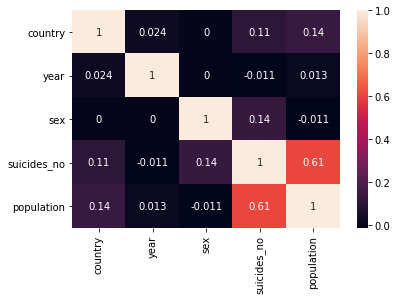

In [19]:
sns.heatmap(data_frame.corr(), annot=True)

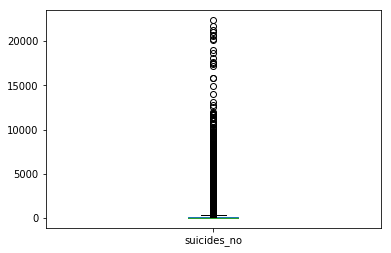

In [20]:
data_frame['suicides_no'].plot.box()

In [21]:
data_frame = data_frame[data_frame['suicides_no'] <= (3 * data_frame['suicides_no'].mean())]
data_frame = data_frame[data_frame['suicides_no'] > (3 * data_frame['suicides_no'].mean())]

print(data_frame.shape)
data_frame.head()

(3567, 6)


,country,year,sex,age,suicides_no,population
1064,0.017094,1979,1,35-54 years,421.0,3299000.0
1066,0.017094,1979,1,55-74 years,395.0,1852000.0
1076,0.017094,1980,1,35-54 years,447.0,3086700.0
1078,0.017094,1980,1,55-74 years,489.0,1766100.0
1087,0.017094,1981,1,25-34 years,224.0,2102200.0


In [22]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(X_train, Y_train)

predictions = knn.predict(X_test)

error = 0
for case, prediction in zip(Y_test, predictions):
    error += abs(case - prediction)

print('Erro Absoluto Médio:',(error / len(predictions)))

Erro Absoluto Médio: 162.55925309669104


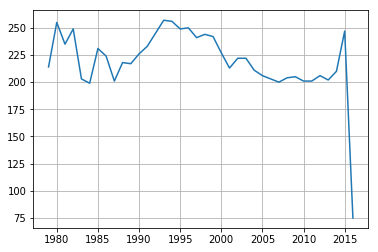

In [23]:
pais = data_frame.loc[data_frame_before_normalization['country'] == 'Brazil']
ano = data_frame_before_normalization.groupby(['year'])

x = list(map(int, ano['year'].unique()))
y = list(map(int, ano['suicides_no'].mean()))

plt.plot(x,y)
plt.grid(True)
plt.show()

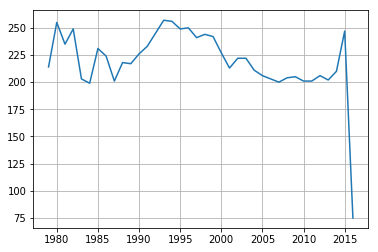

In [24]:
sexo = data_frame_before_normalization.loc[data_frame_before_normalization['sex'] == 'female']

ano = data_frame_before_normalization.groupby(['year'])

x = list(map(int, ano['year'].unique()))
y = list(map(int, ano['suicides_no'].mean()))

plt.plot(x,y)
plt.grid(True)
plt.show()